<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-pnogueron/blob/main/Semana_6_Actividad_A01097897.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Ciencia y analítica de datos</h1>

Actividad semanal 6 - Visualización

Noviembre 01, 2022

Juan Pablo Noguerón Morales - A01097897

Github link: https://github.com/PosgradoMNA/actividades-de-aprendizaje-pnogueron/blob/main/Semana_6_Actividad_A01097897.ipynb

In [186]:
#Imports section
import requests
from io import BytesIO
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt 

# 1. Descarga de datos

In [77]:
#Descarga del archivo Facebook Metrics
url = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
req = requests.get(url)
bt = BytesIO(req.content)

df = pd.read_csv(bt)
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


# 2. Análisis información del Data Frame

In [60]:
print('Shape del dataset: ', df.shape)

#25 columnas y 30,000 registros

Shape del dataset:  (30000, 25)


In [19]:
print('Las columnas del data frame son: ') 
print(df.columns.to_list())

#De las columnas anteriores, la última (Y) es la variable dependiente, mientras que el resto son las variables independientes

Las columnas del data frame son: 
['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'Y']


In [21]:
print('Tipo de dato por columna: ') 
df.dtypes

#Se puede observar que todos los datos son numéricos o decimales. 
#En este caso, no hay problema con la información con tipos de datos desconocidos (object), por lo que no se necesitará realizar casteo de datos

Las columnas del data frame son: 


ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [44]:
df.info()

#Ya desde acá se observan datos nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [43]:
print('Análisis de datos nulos')
df.isna().any()

#Se observa salvo ID y X1, el resto de las variables tiene al menos un dato nulo, por lo que se deberá realizar limpieza / transformación

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

# 3. Limpieza de datos

Empezamos aclarando que, a pesar de que hay columnas que no tienen datos nulos, la imputación y/o limpieza se debe realizar de cualquier manera, pues no sabemos cómo vendrán los datos futuros. Dicho eso, se ha optado por realizar la siguiente limpieza por atributo: 

ID: Id del registro. **Esta variable es solo un incremental indicando el id del registro. Dejarla ahí solo confundirá el modelo. Se procede a dropear la columna completa**

Y: **Al ser la variable de salida, no queremos hacer imputación para prevenir resultados sesgados. Por lo tanto, si hay información nula, procederemos a eliminar el registro**

X1: Monto de crédito - **Variable cuantitativa. Se imputará usando mediana**

X2: Gender (1 = male; 2 = female). - **Variable categórica. Se imputará usando moda**

X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others) - **Variable categórica. Se imputará usando moda**

X4: Marital status (1 = married; 2 = single; 3 = others) - **Variable categórica. Se imputará usando moda**

X5: Age (year). - **Variable cuantitativa. Se imputará usando mediana**

[X6 - X11]: Estos conjuntos de datos responden al comportamiento individual de cada persona, por lo que imputar con moda, mediana o media me parece incorrecto. Dado a que cada conjunto de variables es el comportamiento mes tras mes, mi plan es imputar de la siguiente manera:


1.   Si el conjunto completo ([X6 - X11], por ejemplo), es nulo, quiere decir que no se cuenta con información histórica de ninguna manera para dicho usuario. En este caso, creo que lo mejor es eliminar el registro
2.   Si el conjunto completo tiene al menos un dato, mi estrategia será arrastrar el dato mes con mes usando bfill y ffill. Por ejemplo, si un usuario no realizó un pago en el mes de mayo, considero que la probabilidad de que no pague junio es alta, por lo que en caso de que Junio tenga un dato faltante, simplemente copiaré el mismo valor de Mayo. Lo mismo si, por ejemplo, el valor de Mayo es que si pagó y en Junio nos falta valor, se arrastrará el pago de Mayo que nos indicará que el usuario no cayó en mora. 


[X12-X17], [X18 - X23]: Estos conjuntos de datos responden al comportamiento individual de cada persona, por lo que imputar con moda, mediana o media con respecto al comportamiento de otros usuarios me parece incorrecto. Dado a que cada conjunto de variables es el comportamiento mes tras mes, mi plan es imputar de la siguiente manera:


1.   Si el conjunto completo ([X6 - X11], por ejemplo), es nulo, quiere decir que no se cuenta con información histórica de ninguna manera para dicho usuario. En este caso, creo que lo mejor es eliminar el registro
2.   Si el conjunto completo tiene al menos un dato, mi estrategia será imputar con la mediana del resto de los demás meses, al ser este un valor cuantitativo






In [97]:
#Dataframe de copia
#Primero que nada, trabajaremos sobre una copia del DF original. Esto con el fin de no perder los valores originales

ndf = df.copy()
ndf.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [98]:
#Eliminamos la columna completa de id
targetColumn = 'ID'

if targetColumn in ndf:
    print('El dataset antes de la limpieza tiene ', ndf.shape[1], ' columnas')
    print('Realizando dropeo de la columna ', targetColumn)

    ndf.drop([targetColumn], axis = 1, inplace = True)
    print('El dataset después de la limpieza tiene ', ndf.shape[1], ' columnas')

else:
    print('La columna ', targetColumn, ' no existe en el dataset')


print('\n')
ndf.head()

El dataset antes de la limpieza tiene  25  columnas
Realizando dropeo de la columna  ID
El dataset después de la limpieza tiene  24  columnas




,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [99]:
#Eliminamos los registros que tienen la variable de salida Y nula
targetColumns = 'Y'
recordsBeforeCleaning = ndf.shape[0]
print('El dataset antes de la limpieza tiene', recordsBeforeCleaning, 'registros')
print('Realizando eliminado de registros por valor nulo en columna Y')

ndf.dropna(inplace = True, subset=[targetColumns])

print('El dataset después de la limpieza tiene', ndf.shape[0], 'registros')
print('Se han eliminado', recordsBeforeCleaning - ndf.shape[0], 'registros')

#validamos si quedan registros con valor nulo para la columna dada
if not ndf[targetColumns].isnull().any():
    print('La columna', targetColumns, 'ya no tiene valores nulos')
else:
    print('La columna', targetColumns, 'aún no tiene valores nulos')


print('\nSe puede observar que la columna Y ya no tiene valores nulos')

ndf[['Y']].isna().any()

El dataset antes de la limpieza tiene 30000 registros
Realizando eliminado de registros por valor nulo en columna Y
El dataset después de la limpieza tiene 29997 registros
Se han eliminado 3 registros
La columna Y ya no tiene valores nulos

Se puede observar que la columna Y ya no tiene valores nulos


Y    False
dtype: bool

In [105]:
#Imputaciones cuantitativas por mediana
values = {"X1": ndf.X1.median(), "X5": ndf.X5.median()}

print('Realizando reemplazo de datos con respecto a la información en el dataset completo')

ndf.fillna(value = values, inplace = True)

print('\nSe puede observar que las columnas X1, y X5 ya no son nulas')

ndf[['X1', 'X5']].isna().any()

Realizando reemplazo de datos con respecto a la información en el dataset completo

Se puede observar que las columnas X1, y X5 ya no son nulas


X1    False
X5    False
dtype: bool

In [115]:
#Imputaciones categóricas por moda

#Se usara valores random para elegir aleatoriamente un valor de moda en caso de que haya más de un valor con la misma moda
import random

randomX2 = list(range(0, ndf.X2.mode().size))
randomX3 = list(range(0, ndf.X3.mode().size))
randomX4 = list(range(0, ndf.X4.mode().size))

values = {"X2": ndf.X2.mode()[random.choice(randomX3)], "X3": ndf.X3.mode()[random.choice(randomX3)], "X4": ndf.X4.mode()[random.choice(randomX3)]}

print('Realizando reemplazo de datos con respecto a la información en el dataset completo')

ndf.fillna(value = values, inplace = True)

print('Se puede observar que las columnas X2, X3 y X4 ya no son nulas')

ndf[['X2', 'X3', 'X4']].isna().any()

Realizando reemplazo de datos con respecto a la información en el dataset completo
Se puede observar que las columnas X2, X3 y X4 ya no son nulas


X2    False
X3    False
X4    False
dtype: bool

Ahora eliminamos aquellos registros cuyo conjunto de valores para la misma métrica son todos nulos 

(X6 - X11) </br>
(X12 - X17)</br>
(X18 - X23)</br>

In [119]:
targetColumns = [
      ('X6 - X11',  ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']), 
      ('X12 - X17', ['X12', 'X13', 'X14', 'X15', 'X16', 'X17']),
      ('X18 - X23', ['X18', 'X19', 'X20', 'X21', 'X22', 'X23'])
]

for columns in targetColumns:
    recordsBeforeCleaning = ndf.shape[0]
    print('El dataset antes de la limpieza tiene ', recordsBeforeCleaning, ' registros')
    print('Realizando eliminado de registros por valor nulo en rango de columnas ', columns[0])
    ndf.dropna(inplace = True, subset=columns[1], how = 'all')
    recordsAfterCleaning = ndf.shape[0]
    print('El dataset después de la limpieza tiene ', recordsAfterCleaning, ' registros')
    print('Se han eliminado ', recordsBeforeCleaning - recordsAfterCleaning, ' registros \n')

El dataset antes de la limpieza tiene  29997  registros
Realizando eliminado de registros por valor nulo en rango de columnas  X6 - X11
El dataset después de la limpieza tiene  29994  registros
Se han eliminado  3  registros 

El dataset antes de la limpieza tiene  29994  registros
Realizando eliminado de registros por valor nulo en rango de columnas  X12 - X17
El dataset después de la limpieza tiene  29990  registros
Se han eliminado  4  registros 

El dataset antes de la limpieza tiene  29990  registros
Realizando eliminado de registros por valor nulo en rango de columnas  X18 - X23
El dataset después de la limpieza tiene  29990  registros
Se han eliminado  0  registros 



El siguiente paso es aplicar media para los valores monetarios del universo con respecto a los otros valores DEL MISMO REGISTRO (Esta vez no se obtiene con respecto al dataset completo)

Es importante recalcar:

Las variabes X6 - X11 se llenaron usando métodos bfill y nfill

Las variables X12 - X23 usaron media

Todas las variables se calcularon con respecto a las otras columnas del mismo registro

In [121]:
ndf.loc[:, 'X6':'X6'] = ndf.loc[:, 'X6':'X7'].bfill(axis = 1)
ndf.loc[:, 'X6':'X11'] = ndf.loc[:, 'X6':'X11'].ffill(axis = 1)

cols = ndf.loc[:, 'X12':'X17'].columns
value = ndf[cols].mean(axis = 1)
ndf.fillna({x : value for x in cols}, inplace = True)

cols = ndf.loc[:, 'X18':'X23'].columns
value = ndf[cols].mean(axis = 1)
ndf.fillna({x : value for x in cols}, inplace = True)

print('Finalmente, observamos que ya ninguna columna tiene valores nulos')
ndf.isna().any()

Finalmente, observamos que ya ninguna columna tiene valores nulos


X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

# 4. Estadística descriptiva

In [122]:
ndf.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,...,29990.000000,29990.000000,29990.000000,29990.000000,2.999000e+04,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000
mean,167487.818606,1.603868,1.853084,1.551984,35.482828,-0.016772,-0.133711,-0.166489,-0.220707,-0.266322,...,43272.446566,40321.639997,38880.436712,5663.270657,5.922657e+03,5225.916439,4827.024992,4800.283426,5217.116814,0.221174
std,129736.563051,0.489101,0.790349,0.521966,9.217656,1.123691,1.197130,1.195930,1.169119,1.133079,...,64340.845682,60803.969387,59561.644444,16564.668410,2.304454e+04,17608.971903,15668.513450,15280.576669,17780.205338,0.415044
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.250000,1765.750000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19053.500000,18112.500000,17078.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54551.250000,50208.500000,49208.250000,5006.000000,5.000000e+03,4506.500000,4013.750000,4032.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Para las variables categóricas, la media en realidad no me dice nada, pues la suma de cada uno de los valores por si mismo no es un indicativo cuantitativo que deba sumarse y dividirse por el número del muestreo. Simplemente cada número indica una categoría. Por lo tanto, las variables categóricas serán omitidas en este ejercicio

In [125]:
variables_cuantitativas = ['X1', 'X5', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23']
ndf[variables_cuantitativas].describe()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,29990.000000,29990.000000,29990.000000,29990.000000,2.999000e+04,29990.000000,29990.000000,29990.000000,29990.000000,2.999000e+04,29990.000000,29990.000000,29990.000000,29990.000000
mean,167487.818606,35.482828,51235.081127,49188.996932,4.702364e+04,43272.446566,40321.639997,38880.436712,5663.270657,5.922657e+03,5225.916439,4827.024992,4800.283426,5217.116814
std,129736.563051,9.217656,73644.422817,71182.596940,6.935776e+04,64340.845682,60803.969387,59561.644444,16564.668410,2.304454e+04,17608.971903,15668.513450,15280.576669,17780.205338
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3565.000000,2986.000000,2.668500e+03,2329.250000,1765.750000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000
50%,140000.000000,34.000000,22383.000000,21200.000000,2.008950e+04,19053.500000,18112.500000,17078.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67134.250000,64025.500000,6.017925e+04,54551.250000,50208.500000,49208.250000,5006.000000,5.000000e+03,4506.500000,4013.750000,4032.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


X1: Monto de crédito medio es de 167,487 con una desviación estandar de $129,736. Observamos outliers de hasta 1 M

X5: Edad promedio de 35 años, con una desviación estandar de 9 años. También tiene outliers de hasta 79 años

X12 - X17: Monto de statement. Al ser cantidades numéricas históricas de mes tras mes, se espera que la media y distribución sea muy parecida entre cada variable, es decir, se espera un comportamiento similar a nivel dataset entre mayo y junio, por ejemplo. La media ronda entre los 40,000 - 50,000, con una desviación estandar promedio de 60,000 - 70,000

X18 - X23: Monto de pago. Al ser cantidades numéricas históricas de mes tras mes, se espera que la media y distribución sea muy parecida entre cada variable, es decir, se espera un comportamiento similar a nivel dataset entre mayo y junio, por ejemplo. La media ronda entre los 4,000 - 5,000, con una desviación estadar promedio de 15,000 - 16,000

# 5. Conteo de variables categóricas

In [173]:
variables_categoricas = ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']

print('Tenemos un total de', len(variables_categoricas), 'variables categóricas \n')

for current_variable in variables_categoricas:
  print('La variable categórica', current_variable, 'tiene los valores', ndf[current_variable].unique())
  print('Su moda es', int(ndf[current_variable].mode()))
  print('Y el conteo por valor es:')
  print(ndf[current_variable].value_counts(), '\n')

Tenemos un total de 9 variables categóricas 

La variable categórica X2 tiene los valores [2. 1.]
Su moda es 2
Y el conteo por valor es:
2.0    18110
1.0    11880
Name: X2, dtype: int64 

La variable categórica X3 tiene los valores [2. 1. 3. 5. 4. 6. 0.]
Su moda es 2
Y el conteo por valor es:
2.0    14026
1.0    10582
3.0     4914
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64 

La variable categórica X4 tiene los valores [1. 2. 3. 0.]
Su moda es 2
Y el conteo por valor es:
2.0    15962
1.0    13651
3.0      323
0.0       54
Name: X4, dtype: int64 

La variable categórica X6 tiene los valores [ 2. -1.  0. -2.  1.  3.  4.  8.  7.  5.  6.]
Su moda es 0
Y el conteo por valor es:
 0.0    14735
-1.0     5683
 1.0     3687
-2.0     2758
 2.0     2664
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: X6, dtype: int64 

La variable categórica X7 tiene los valores [ 2.  0. -1. -2.  3.  5.  7.  4.  1.  6.  8.]
Su moda es 0
Y el 

# 6. Escalamiento de datos

Se hará escalamiento a las variables cuantitativas para evitar que éstas tengan mayor peso que las variables categóricas a la hora del entrenamiento

In [176]:
scaler = MinMaxScaler()

#antes del escalamiento 
ndf[variables_cuantitativas].head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,20000,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0


In [184]:
#después del escalamiento
ndf[variables_cuantitativas] = scaler.fit_transform(ndf[variables_cuantitativas])

ndf[variables_cuantitativas].head()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,0.010101,0.051724,0.149982,0.069164,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,0.086207,0.148892,0.067858,0.087817,0.163220,0.084074,0.263485,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,0.224138,0.172392,0.079532,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,0.275862,0.188100,0.111995,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,0.620690,0.154144,0.071601,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


# 7. PCA

# 8. Histogramas de atributos

In [204]:
sns.set(rc={'figure.figsize':(23,12)})

Empezamos con los atributos cuantitativos

In [205]:
ndf[variables_cuantitativas].describe()

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
count,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000
mean,0.159079,0.249704,0.191856,0.112902,0.112163,0.200900,0.120630,0.290858,0.006483,0.003516,0.005832,0.007773,0.011254,0.009868
std,0.131047,0.158925,0.065167,0.067554,0.038080,0.060608,0.060291,0.045772,0.018962,0.013682,0.019652,0.025231,0.035825,0.033632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040404,0.120690,0.149674,0.069054,0.087810,0.162332,0.082399,0.261944,0.001145,0.000496,0.000435,0.000477,0.000594,0.000223
50%,0.131313,0.224138,0.166326,0.086340,0.097375,0.178086,0.098608,0.274103,0.002404,0.001193,0.002009,0.002415,0.003517,0.002837
75%,0.232323,0.344828,0.205925,0.126983,0.119386,0.211524,0.130433,0.298794,0.005731,0.002969,0.005029,0.006463,0.009454,0.007566
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


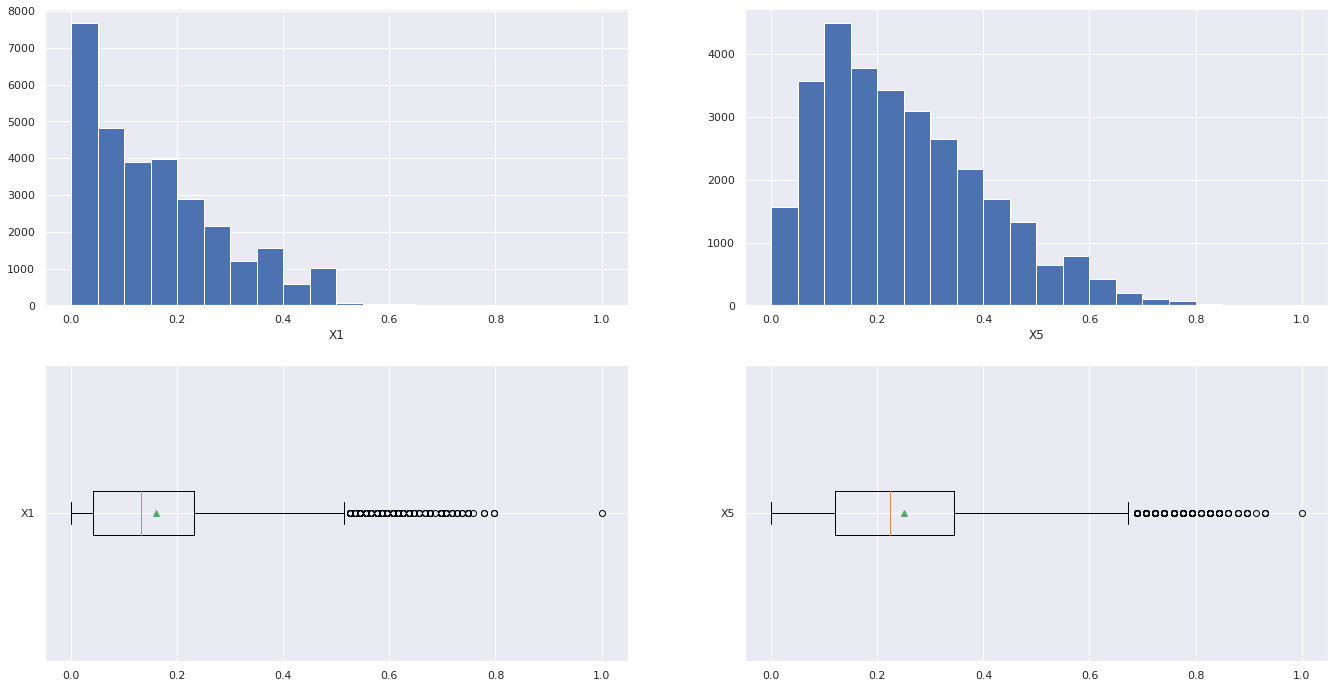

In [206]:
#Monto de credito y edad
variables_cuantitativas_s1 = ['X1', 'X5']
fig, axes = plt.subplots(2, 2)    # Definimos nicho

for k in range(0, 2):
  plt.subplot(2, 2, k + 1)
  plt.hist(ndf[variables_cuantitativas_s1[k]], bins=20)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(variables_cuantitativas_s1[k])
  
  plt.subplot(2, 2, k + 3)
  plt.boxplot(ndf[variables_cuantitativas_s1[k]], vert = False, showmeans = True, labels = variables_cuantitativas_s1[k : k + 1] )

plt.show()

Observamos que ambas tienen sesgo positivo, la disperción no es acampanada

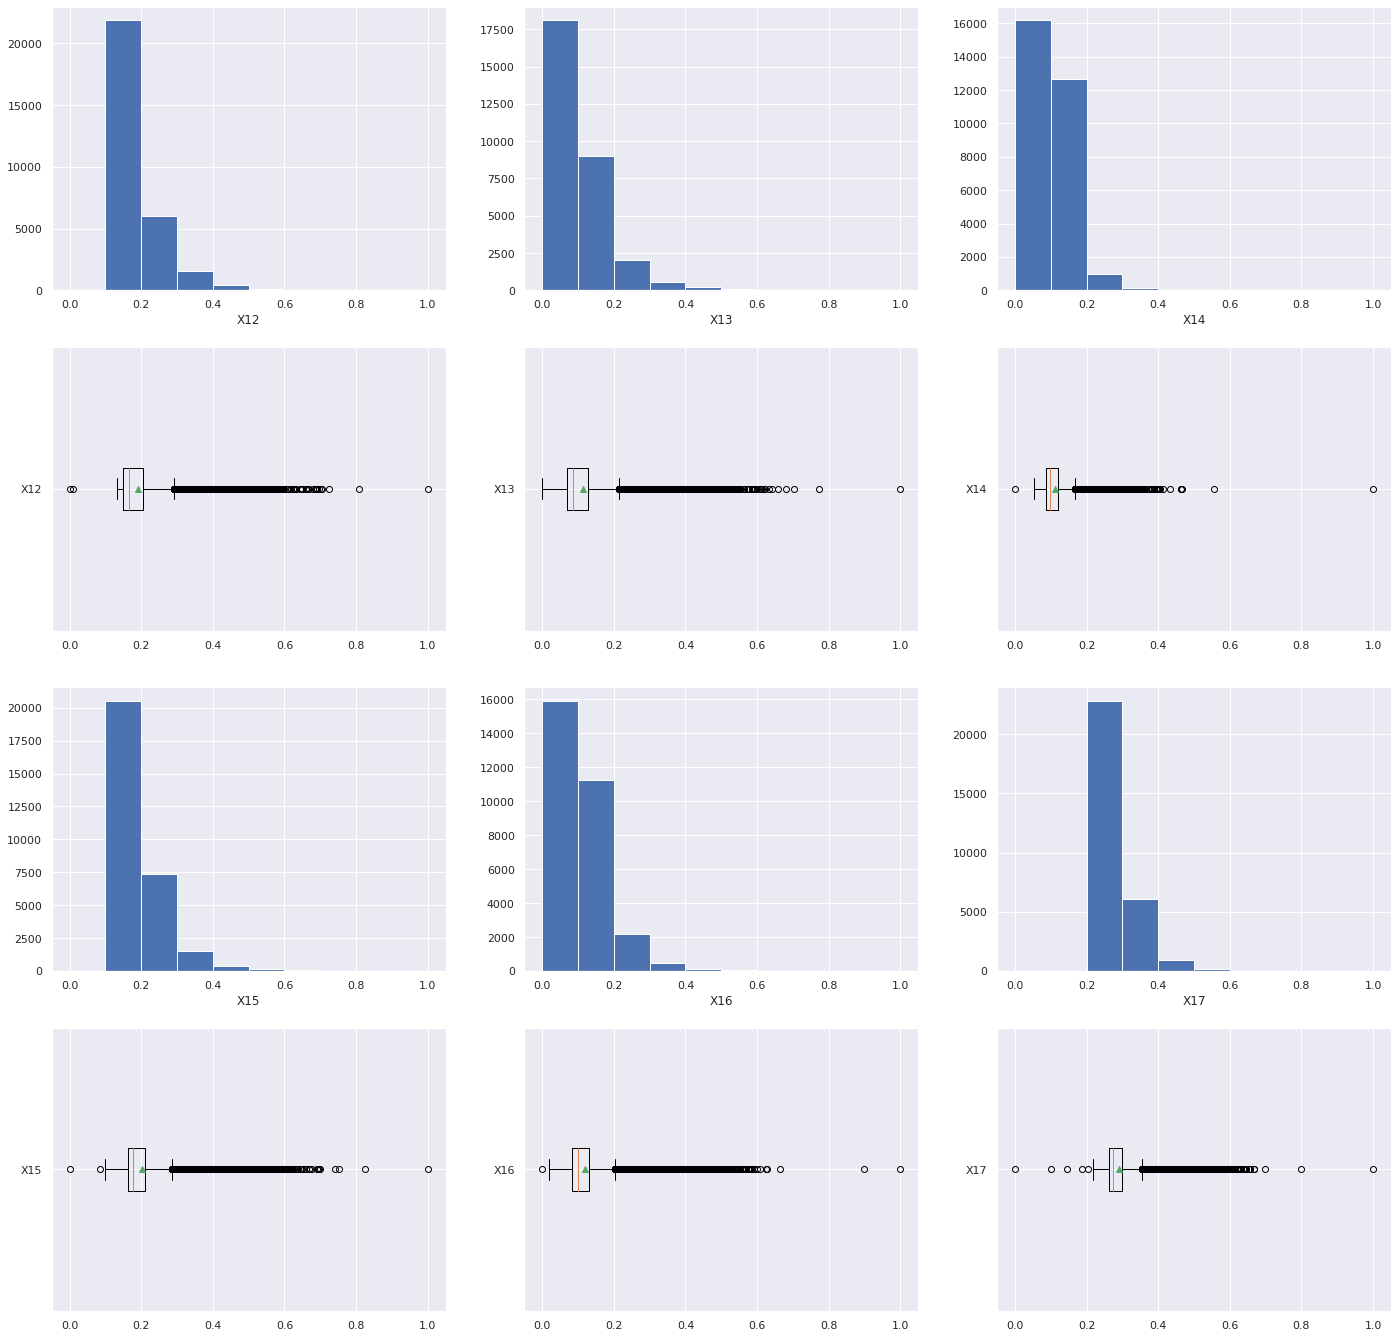

In [207]:
#X12 - X17
sns.set(rc={'figure.figsize':(24, 24)})
variables_cuantitativas_s2 = ['X12', 'X13', 'X14', 'X15', 'X16', 'X17']
fig, axes = plt.subplots(4, 3)    # Definimos nicho

j = 0

for k in range(0, 6):
  plt.subplot(4, 3, k + j + 1)
  plt.hist(ndf[variables_cuantitativas_s2[k]], bins=10)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(variables_cuantitativas_s2[k])
  
  plt.subplot(4, 3, k + j + 4)
  plt.boxplot(ndf[variables_cuantitativas_s2[k]], vert = False, showmeans = True, labels = variables_cuantitativas_s2[k : k + 1] )

  if k == 2:
    j = 3

plt.show()

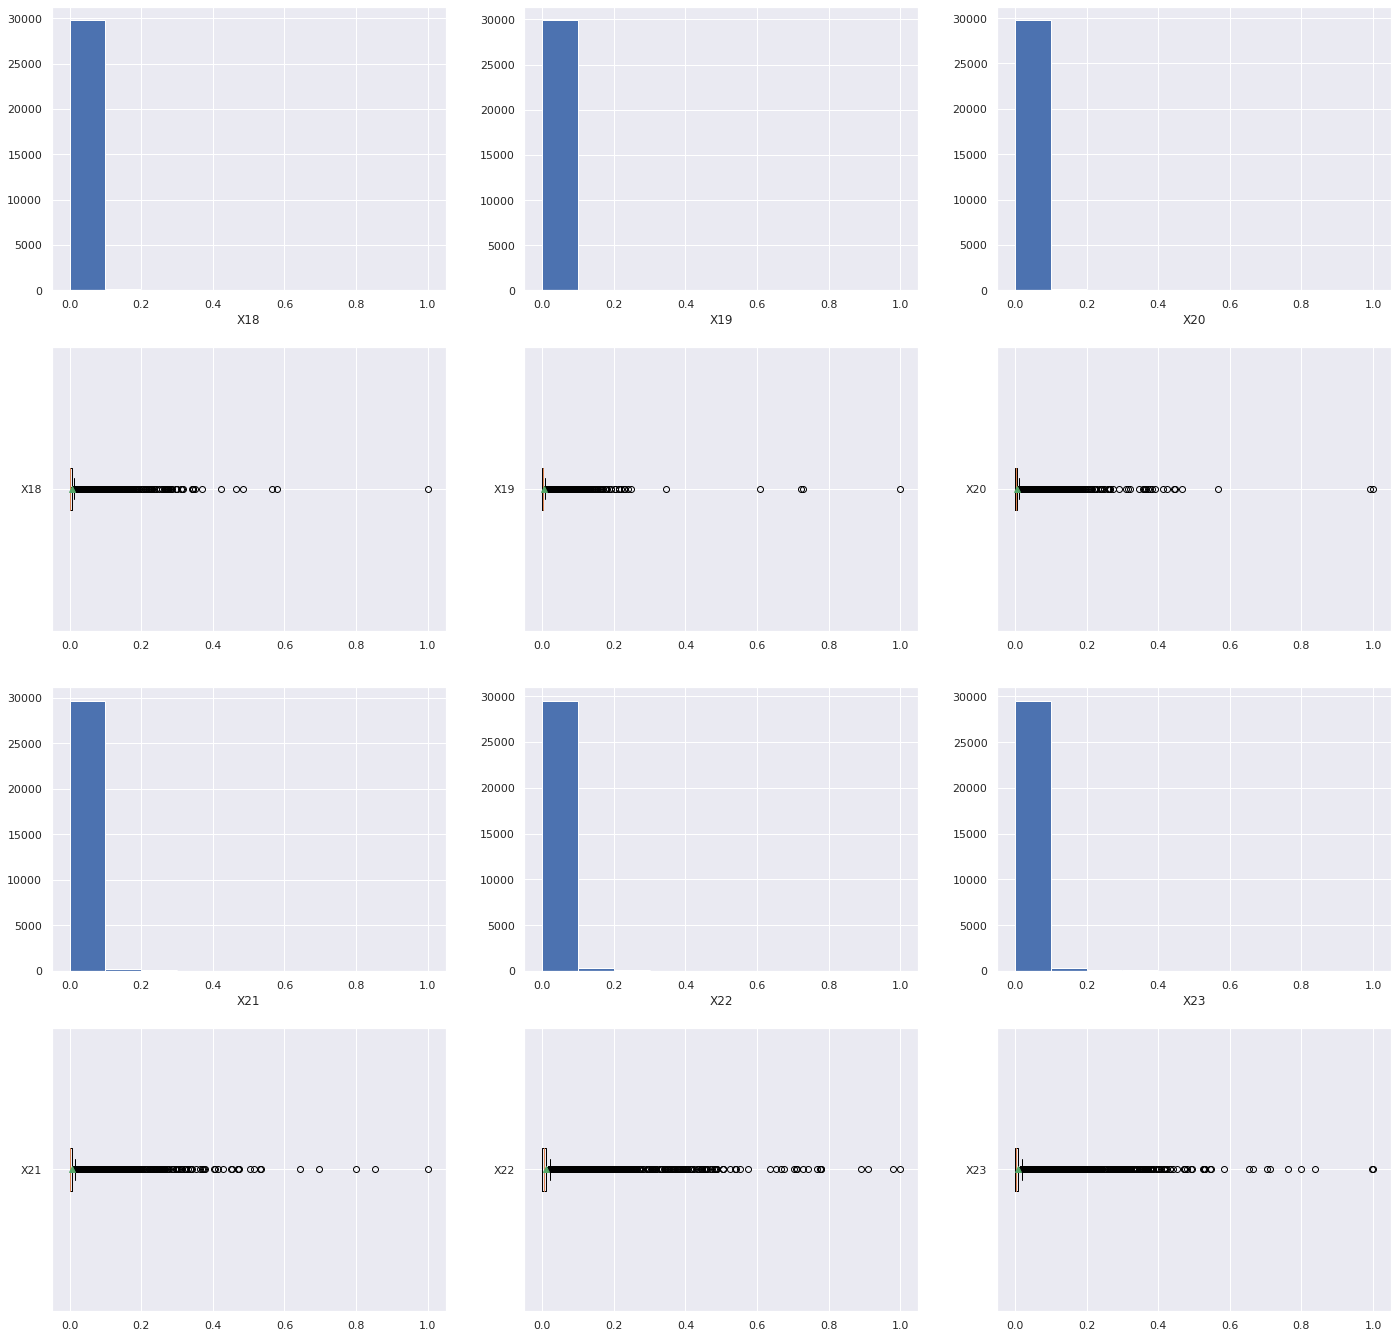

In [208]:
#X18 - X23
sns.set(rc={'figure.figsize':(24, 24)})
variables_cuantitativas_s3 = ['X18', 'X19', 'X20', 'X21', 'X22', 'X23']
fig, axes = plt.subplots(4, 3)    # Definimos nicho

j = 0

for k in range(0, 6):
  plt.subplot(4, 3, k + j + 1)
  plt.hist(ndf[variables_cuantitativas_s3[k]], bins=10)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(variables_cuantitativas_s3[k])
  
  plt.subplot(4, 3, k + j + 4)
  plt.boxplot(ndf[variables_cuantitativas_s3[k]], vert = False, showmeans = True, labels = variables_cuantitativas_s3[k : k + 1] )

  if k == 2:
    j = 3

plt.show()

Variable categoricas

In [209]:
ndf[variables_categoricas].describe()

,X2,X3,X4,X6,X7,X8,X9,X10,X11
count,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000,29990.000000
mean,1.603868,1.853084,1.551984,-0.016772,-0.133711,-0.166489,-0.220707,-0.266322,-0.291130
std,0.489101,0.790349,0.521966,1.123691,1.197130,1.195930,1.169119,1.133079,1.149952
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.000000,6.000000,3.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


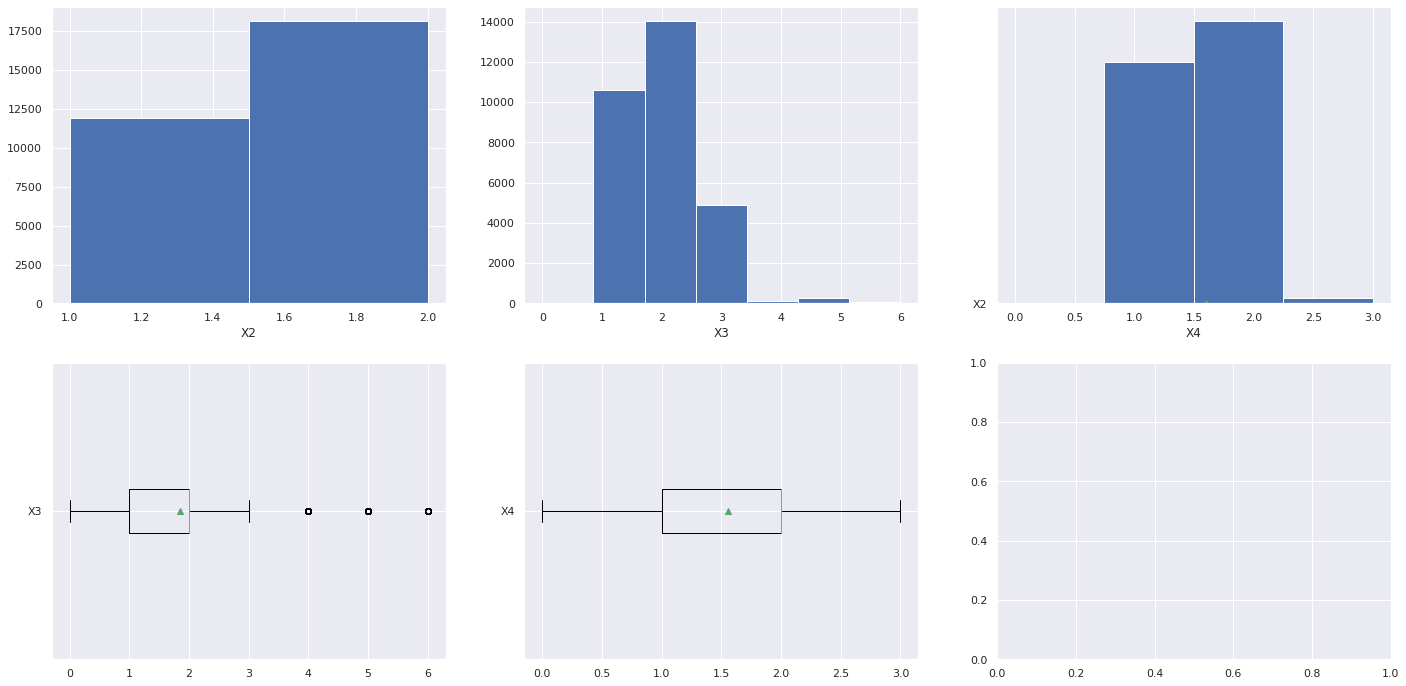

In [213]:
#Monto de credito y edad
sns.set(rc={'figure.figsize':(24, 12)})
variables_categoricas_s1 = ['X2', 'X3', 'X4']
bins_array = [2, 7, 4]
fig, axes = plt.subplots(2, 3)    # Definimos nicho

for k in range(0, 3):
  plt.subplot(2, 3, k + 1)
  plt.hist(ndf[variables_categoricas_s1[k]], bins=bins_array[k])     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(variables_categoricas_s1[k])
  
  plt.subplot(2, 3, k + 3)
  plt.boxplot(ndf[variables_categoricas_s1[k]], vert = False, showmeans = True, labels = variables_categoricas_s1[k : k + 1] )

plt.show()

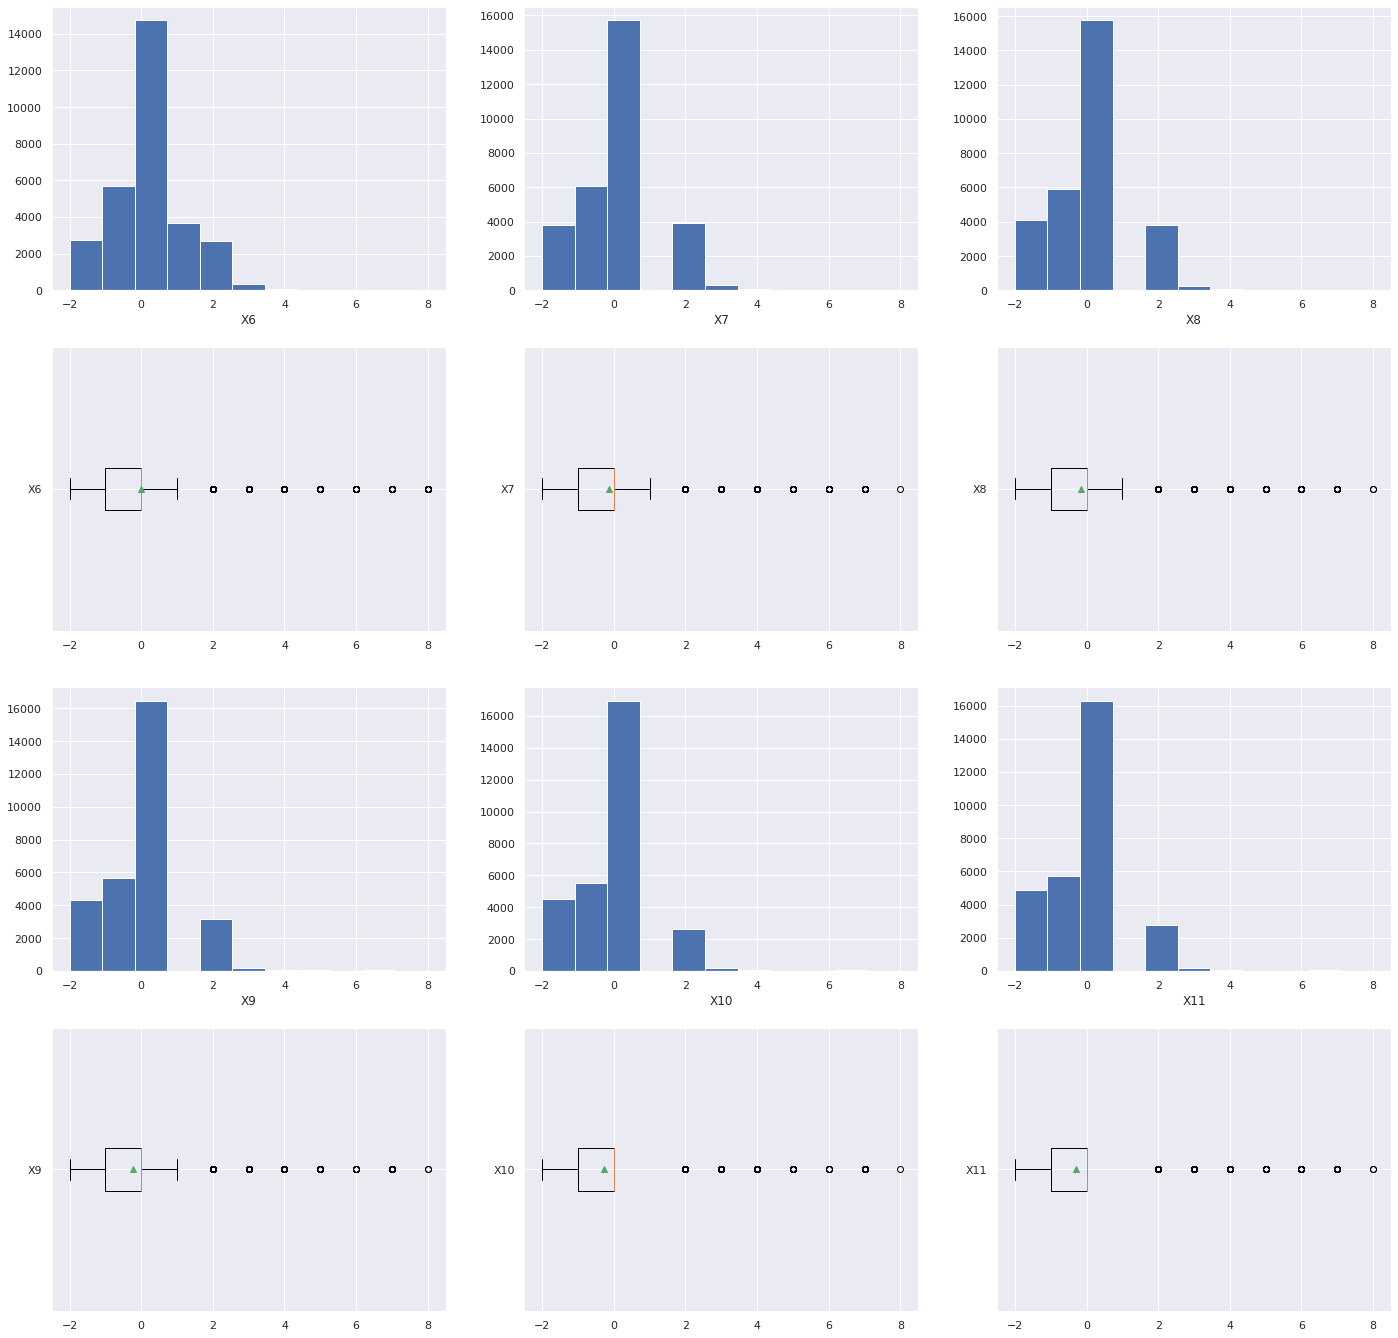

In [215]:
#X18 - X23
sns.set(rc={'figure.figsize':(24, 24)})
variables_categoricas_s2 = ['X6', 'X7', 'X8', 'X9', 'X10', 'X11']
fig, axes = plt.subplots(4, 3)    # Definimos nicho

j = 0

for k in range(0, 6):
  plt.subplot(4, 3, k + j + 1)
  plt.hist(ndf[variables_categoricas_s2[k]], bins=11)     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(variables_categoricas_s2[k])
  
  plt.subplot(4, 3, k + j + 4)
  plt.boxplot(ndf[variables_categoricas_s2[k]], vert = False, showmeans = True, labels = variables_categoricas_s2[k : k + 1] )

  if k == 2:
    j = 3

plt.show()

# 9 - 10 Visualizacion e interpretación de datos

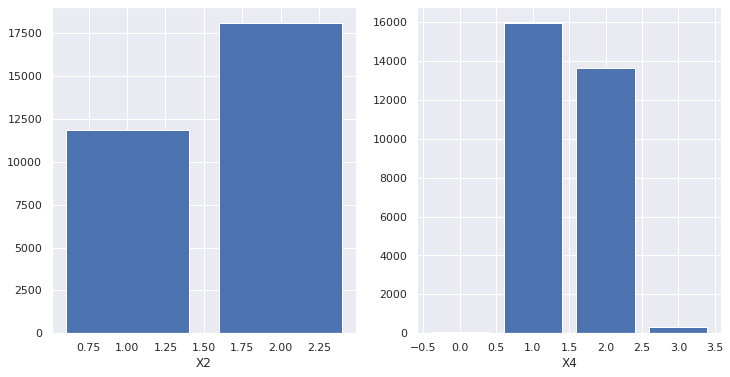

In [253]:
#Gráfico de barras por sexo y estado civil
#X18 - X23
sns.set(rc={'figure.figsize':(12, 6)})
variables_pie = ['X2', 'X4']
fig, axes = plt.subplots(1, 2)    # Definimos nicho

for k in range(0, 2):
  plt.subplot(1, 2, k + 1)
  plt.bar(ndf[variables_pie[k]].unique(), ndf[variables_pie[k]].value_counts().to_list())     # datatrain.columns nos devuelve una lista con los nombres de las columnas.
  plt.xlabel(variables_pie[k])

plt.show()


Se puede observar la población de hombres es inferior a la de mujeres, mientras que hay más personas casadas que solteras

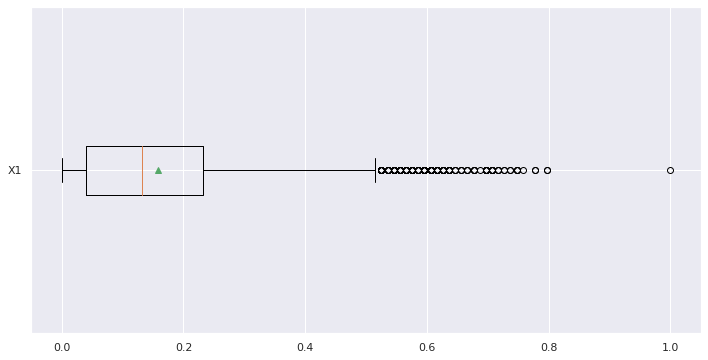

In [255]:
#Monto de credito y edad
variables_cuantitativas_s1 = ['X1']
fig, axes = plt.subplots(1, 1)    # Definimos nicho

for k in range(0, 1):
  plt.subplot(1, 1, k + 1)
  plt.boxplot(ndf[variables_cuantitativas_s1[k]], vert = False, showmeans = True, labels = variables_cuantitativas_s1[k : k + 1] )

plt.show()

Acá podemos observar la disperción del monto de crédito. Vemos demasiados outliers con sesgo negativo. Probablemente valga la pena hacer una transformación de raiz cuadrada para acampanar la distribución antes de realizar el entrenamiento

Text(0.5, 0.98, 'Categorical Plotting')

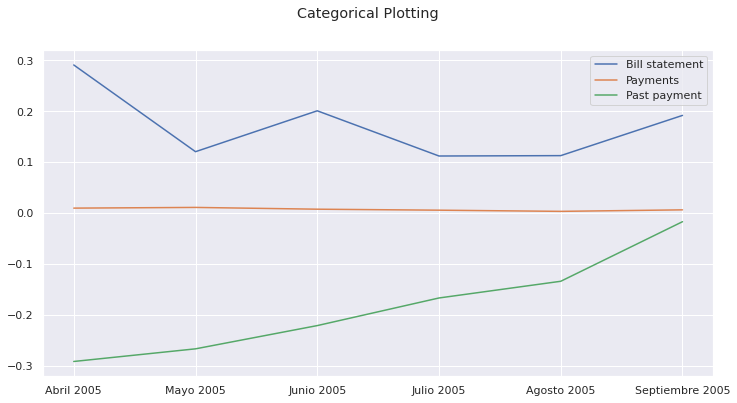

In [282]:
#plotchart
data = {
    'Abril 2005': ndf['X17'].mean(),
    'Mayo 2005': ndf['X16'].mean(), 
    'Junio 2005': ndf['X15'].mean(), 
    'Julio 2005': ndf['X14'].mean(), 
    'Agosto 2005': ndf['X13'].mean(), 
    'Septiembre 2005': ndf['X12'].mean()
}
names = list(data.keys())
values = list(data.values())

data2 = {
    'Abril 2005': ndf['X23'].mean(),
    'Mayo 2005': ndf['X22'].mean(), 
    'Junio 2005': ndf['X21'].mean(), 
    'Julio 2005': ndf['X20'].mean(), 
    'Agosto 2005': ndf['X19'].mean(), 
    'Septiembre 2005': ndf['X18'].mean()
}
names2 = list(data2.keys())
values2 = list(data2.values())

data3 = {
    'Abril 2005': ndf['X11'].mean(),
    'Mayo 2005': ndf['X10'].mean(), 
    'Junio 2005': ndf['X9'].mean(), 
    'Julio 2005': ndf['X8'].mean(), 
    'Agosto 2005': ndf['X7'].mean(), 
    'Septiembre 2005': ndf['X6'].mean()
}
names3 = list(data3.keys())
values3 = list(data3.values())

fig, axs = plt.subplots(1, 1)
plt.plot(names, values, label = 'Bill statement')
plt.plot(names2, values2, label = 'Payments')
plt.plot(names3, values3, label = 'Past payment')
plt.legend()
fig.suptitle('Categorical Plotting')


Se puede observar el promedio de valor de estado de cuenta medio por mes, siendo abril el mes de mayor facturación del banco.

Por otro lado, vemos que los pagos realizados en promedio no aumentaron, más bien se mantuvieron estables, lo que nos podría indicar que esa variable podría no tener efecto alguno sobre la variable de salida. 

Finalmente, podemos observar que hubo más impagos durante los meses de abril, y fueron poniéndose al corriente con el pasar de los meses. Esto podría indicarnos una correlación directa entre el bill statement y los impagos